In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import load_boston
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Columns description

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [85]:
X, y = load_boston(return_X_y=True)

In [86]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Data

In [87]:
df_data = pd.DataFrame(data=data.data,columns=data.feature_names)
df_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Target

In [97]:
df_target = pd.DataFrame(data.target)
df_target.rename(columns={0:"MEDV (Target)"}, inplace=True)

# Merged Dataframe

In [98]:
df = df_data.merge(df_target, left_index=True,right_index=True)

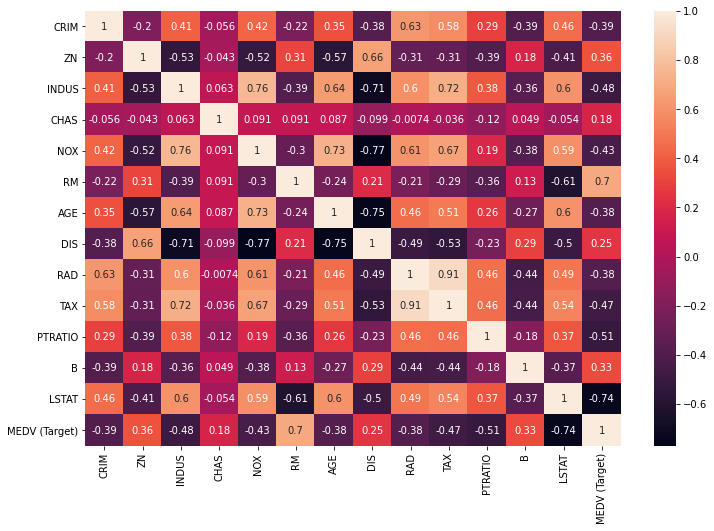

In [99]:
corr= df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.show()

# Train Test Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# Model all features

In [101]:
lr = LinearRegression()
print(lr,lr.get_params())

LinearRegression() {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [102]:
lr.fit(X_train, y_train)

LinearRegression()

In [103]:
lr.predict(X_test)

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [104]:
lr.score(X_test,y_test)

0.7112260057484974

In [129]:
# Save model
joblib.dump(lr,"AllFeatures.joblib")

['AllFeatures.joblib']

# Model 3 features

In [122]:
X = df_data.loc[:,['ZN', 'RM','B']]
X

,ZN,RM,B
0,18.0,6.575,396.90
1,0.0,6.421,396.90
2,0.0,7.185,392.83
3,0.0,6.998,394.63
4,0.0,7.147,396.90
...,...,...,...
501,0.0,6.593,391.99
502,0.0,6.120,396.90
503,0.0,6.976,396.90
504,0.0,6.794,393.45


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [130]:
lr.fit(X_train,y_train)

LinearRegression()

In [131]:
lr.predict(X_test)

array([24.1943099 , 28.72143209, 20.43757554, 21.14353936, 22.9404741 ,
       22.50645655, 19.87485282, 21.98541841, 22.62538822, 20.9740982 ,
       20.33817467, 21.03859959,  0.70363041, 22.42907327, 18.16182711,
       28.397305  , 19.30131664, 10.78209509, 39.6323861 , 22.29614974,
       23.57173438, 26.4120256 , 17.43601847, 25.58831272, 18.89116968,
       14.85474562, 19.67305613, 17.16424543, 20.32298054, 19.02449054,
       17.16692445, 24.31269671, 31.73459366, 15.01032378, 19.14649615,
       14.96720766, 30.5626499 , 19.65204665, 20.89739021, 22.30899405,
       15.64405495, 29.19748495, 41.48309296, 17.8606181 , 24.12035872,
       18.28548689, 17.30089683, 23.91084301, 22.14553627, 26.29328067,
       21.33309525, 29.54742085, 21.9363509 , 27.25039989, 33.70000921,
       23.15351082, 22.55064019, 31.21402947, 24.00310236, 18.14730838,
       28.11064005, 34.84422392, 24.95638978, 13.52070197, 27.39140258,
       15.25915387, 24.56724017, 24.29435831, 28.75296358, 10.96

In [132]:
lr.score(X_test,y_test)

0.5536402131547917

In [134]:
joblib.dump(lr,"ZN_RM_B_lrModel.joblib")

['ZN_RM_B_lrModel.joblib']